In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
data=pd.read_csv('BreastCancerData (4).csv')

In [168]:
data.head(20)

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0
5,52,14.557711,1,1,1,1,1,14,0,1
6,52,14.604623,1,1,1,0,0,12,0,1
7,49,14.638204,1,1,1,0,0,12,1,0
8,50,14.726225,1,1,1,0,0,13,0,0
9,39,14.887039,1,1,0,0,0,8,1,1


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


In [169]:
data.head(5)

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


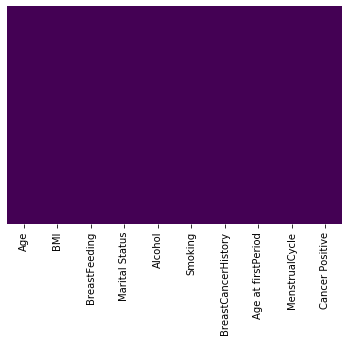

In [77]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
data.dropna(inplace=True)

In [79]:
data

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0
...,...,...,...,...,...,...,...,...,...,...
2383,29,42.647228,1,1,1,0,0,12,1,1
2384,29,43.258102,1,1,1,0,0,13,1,1
2385,51,44.171130,0,1,1,1,1,14,0,1
2386,41,57.760975,1,1,0,0,0,13,1,1


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = data[['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle']]
y = data['Cancer Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
from sklearn.cluster import KMeans

In [158]:
kmn=KMeans(n_clusters = 1, init = 'k-means++', max_iter = 300, n_init = 10, random_state=101)

In [159]:
fittedModel=kmn.fit(X_train,y_train)

In [160]:
kmn_predictions = kmn.predict(X_test)

In [161]:
from sklearn.metrics import classification_report,confusion_matrix

In [162]:
 print(classification_report(y_test,kmn_predictions))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       468
           1       0.00      0.00      0.00       321

    accuracy                           0.59       789
   macro avg       0.30      0.50      0.37       789
weighted avg       0.35      0.59      0.44       789



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [163]:
print(confusion_matrix(y_test,kmn_predictions))

[[468   0]
 [321   0]]


In [164]:
import joblib as jb

In [165]:
jb.dump(kmn,'model.pkl')

['model.pkl']

In [166]:
model=jb.load('model.pkl')

In [167]:
print(model.predict([[21,21.1,0,3,0,0,0,15,1]]))

[0]
